In [1]:
# Import packages
import sys
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Convolution2D,Activation,Flatten,Dense,Dropout,MaxPool2D,BatchNormalization
from keras import callbacks
import time
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import  Dropout, Input
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
%matplotlib inline
start = time.time()

In [2]:
#Import image dataset to kaggle notebook
train_path = '../input/images/Training'
valid_path = '../input/images/Validation'
test_path = '../input/images/' 
#Data augmentation is a strategy used to increase the amount of data by using techniques like cropping, padding, flipping, etc..
#ImageDataGenerator generates batches of tensor image data with real-time data augmentation

train_data = ImageDataGenerator(rescale=1/255.,rotation_range=20,width_shift_range=0.2,
                                             height_shift_range=0.2,zoom_range=0.2,
                                             horizontal_flip=True).flow_from_directory(train_path, target_size=(224,224), 
                                                         class_mode='categorical',seed =42)
valid_data = ImageDataGenerator(rescale=1./ 255).flow_from_directory(valid_path, target_size=(224,224), 
                                                          class_mode='categorical',seed =42)
test_data = ImageDataGenerator(rescale=1./ 255).flow_from_directory(test_path, target_size=(224,224),classes=['Testing'],seed=42)

Found 1440 images belonging to 6 classes.
Found 480 images belonging to 6 classes.
Found 480 images belonging to 1 classes.


In [3]:

# Convolution Neural Networks (CNN)
model = Sequential()

model.add(Conv2D(8, kernel_size=(3,3), padding='same', input_shape = (224,224,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(3, 3)))

model.add(Conv2D(16, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

# Compile the model
model.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tensorflow.keras.optimizers.RMSprop(lr=1e-4),
                metrics=["accuracy"])

# Fit the model
history_1 = model.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/10
45/45 [==============================] - 55s 1s/step - loss: 2.6376 - accuracy: 0.1822 - val_loss: 1.7914 - val_accuracy: 0.1854
Epoch 2/10
45/45 [==============================] - 34s 771ms/step - loss: 2.0056 - accuracy: 0.2402 - val_loss: 1.8334 - val_accuracy: 0.1604
Epoch 3/10
45/45 [==============================] - 35s 784ms/step - loss: 1.8917 - accuracy: 0.2526 - val_loss: 1.8641 - val_accuracy: 0.1708
Epoch 4/10
45/45 [==============================] - 35s 779ms/step - loss: 1.7822 - accuracy: 0.2820 - val_loss: 1.9148 - val_accuracy: 0.1667
Epoch 5/10
45/45 [==============================] - 35s 784ms/step - loss: 1.7483 - accuracy: 0.2896 - val_loss: 1.8906 - val_accuracy: 0.1646
Epoch 6/10
45/45 [==============================] - 35s 785ms/step - loss: 1.6905 - accuracy: 0.3166 - val_loss: 1.8491 - val_accuracy: 0.1771
Epoch 7/10
45/45 [==============================] - 35s 791ms/step - loss: 1.6353 - accuracy: 0.3449 - val_loss: 1.7959 - val_accuracy: 0.2250
Ep

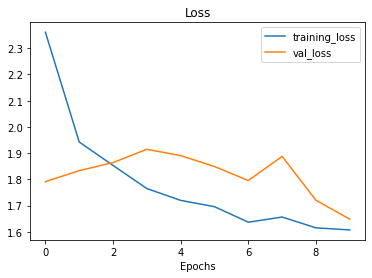

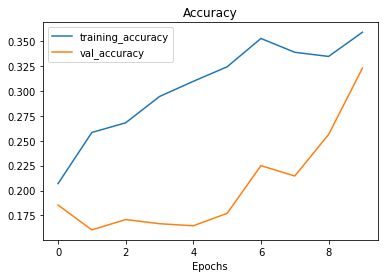

In [4]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curves(history_1)

VGG16 is a convolutional neural network model proposed by K. ... Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”. The model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes

In [5]:
# I am using pretrained VGG16 network by skipping the last 4 layers
batch_size = 32

vgg16_model = tensorflow.keras.applications.vgg16.VGG16(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))
for layer in vgg16_model.layers[:-4]:
    layer.trainable = False
# Create the model
model2 = Sequential()
 
# Add the vgg convolutional base model
model2.add(vgg16_model)
 
# Add new layers
model2.add(Flatten())
model2.add(Dense(1024, activation='relu'))
model2.add(Dense(6, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model2.summary()


58892288/58889256 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 6150      
Total params: 40,411,974
Trainable params: 32,776,710
Non-trainable params: 7,635,264
_________________________________________________________________


In [6]:
model2.compile(loss='categorical_crossentropy',
              optimizer=tensorflow.keras.optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])
history = model2.fit(
      train_data,
      steps_per_epoch=train_data.samples/train_data.batch_size ,
      epochs=15,
      validation_data=valid_data,
      validation_steps=valid_data.samples/valid_data.batch_size,
      verbose=1)


Epoch 1/15
45/45 [==============================] - 40s 806ms/step - loss: 1.7772 - acc: 0.2468 - val_loss: 1.5277 - val_acc: 0.4187
Epoch 2/15
45/45 [==============================] - 36s 808ms/step - loss: 1.5123 - acc: 0.4168 - val_loss: 1.3340 - val_acc: 0.4854
Epoch 3/15
45/45 [==============================] - 37s 815ms/step - loss: 1.3593 - acc: 0.4617 - val_loss: 1.2797 - val_acc: 0.5083
Epoch 4/15
45/45 [==============================] - 38s 832ms/step - loss: 1.2425 - acc: 0.5302 - val_loss: 1.1827 - val_acc: 0.5562
Epoch 5/15
45/45 [==============================] - 37s 828ms/step - loss: 1.1963 - acc: 0.5579 - val_loss: 1.2379 - val_acc: 0.5354
Epoch 6/15
45/45 [==============================] - 37s 827ms/step - loss: 1.1109 - acc: 0.5764 - val_loss: 1.1580 - val_acc: 0.5688
Epoch 7/15
45/45 [==============================] - 37s 824ms/step - loss: 1.1145 - acc: 0.5804 - val_loss: 1.1517 - val_acc: 0.5771
Epoch 8/15
45/45 [==============================] - 37s 818ms/step - 

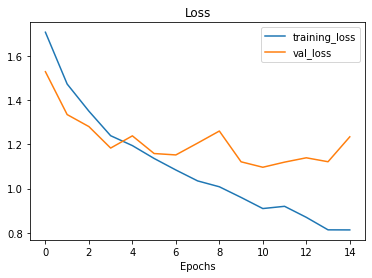

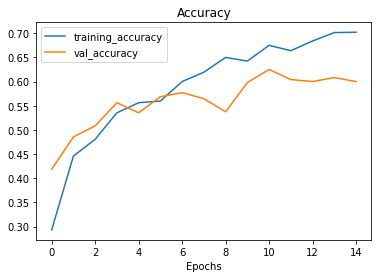

In [7]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['acc']
  val_accuracy = history.history['val_acc']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();
plot_loss_curves(history)

In [8]:
#Label the prediction as classes
import keras
import pandas as pd
predictions = model2.predict(test_data)
y_classes =list(np.argmax(predictions,axis=1))

def to_label(value):
    if value == 0:
        return 'Bicycle'
    elif value == 1:
        return 'Boat'
    elif value == 2:
        return 'Cat'
    elif value == 3:
        return 'Motorbike'
    elif value == 4:
        return 'People'
    else:
        return 'Table'
    
filenames = test_data.filenames
filenames
df = pd.DataFrame()
df['filenames'] = filenames
#df['pred_prob'] = predictions
df['classno'] = y_classes
df['classes']=df['classno'].map(lambda x: to_label(x))
df2 = df[['filenames','classes']]
print(df2.head(50))
df2.to_csv('/kaggle/working/test_data_prediction.csv',index=False)


                  filenames    classes
0    Testing/2015_00401.jpg     People
1    Testing/2015_00402.jpg      Table
2    Testing/2015_00403.jpg     People
3    Testing/2015_00404.jpg      Table
4    Testing/2015_00405.jpg     People
5    Testing/2015_00406.jpg      Table
6    Testing/2015_00407.jpg  Motorbike
7    Testing/2015_00408.jpg     People
8    Testing/2015_00409.jpg    Bicycle
9    Testing/2015_00410.jpg      Table
10   Testing/2015_00411.jpg    Bicycle
11   Testing/2015_00412.jpg    Bicycle
12   Testing/2015_00413.jpg      Table
13   Testing/2015_00414.jpg        Cat
14   Testing/2015_00415.jpg  Motorbike
15   Testing/2015_00416.jpg       Boat
16   Testing/2015_00417.jpg      Table
17   Testing/2015_00418.jpg      Table
18   Testing/2015_00419.jpg     People
19   Testing/2015_00420.jpg        Cat
20   Testing/2015_00421.jpg        Cat
21   Testing/2015_00422.jpg     People
22   Testing/2015_00423.jpg    Bicycle
23   Testing/2015_00424.jpg  Motorbike
24   Testing/2015_00425.j

In [9]:
#Calculate execution time
end = time.time()
dur = end-start

if dur<60:
    print("Execution Time:",dur,"seconds")
elif dur>60 and dur<3600:
    dur=dur/60
    print("Execution Time:",dur,"minutes")
else:
    dur=dur/(60*60)
    print("Execution Time:",dur,"hours")

Execution Time: 15.922121000289916 minutes
